In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from node2vec import Node2Vec
from sklearn.cluster import AgglomerativeClustering , KMeans
from sklearn.metrics import silhouette_score , davies_bouldin_score
import numpy as np
import warnings 
warnings.filterwarnings("ignore")


# Initial Graph

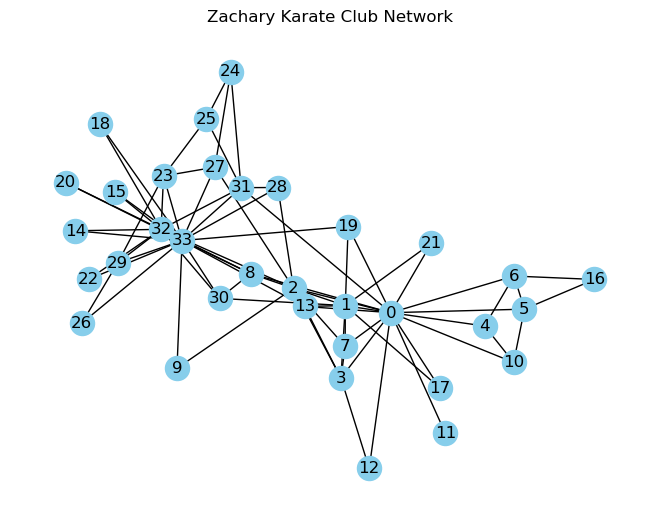

In [3]:

# ایجاد گراف کاراته
G = nx.karate_club_graph()

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300)
plt.title('Zachary Karate Club Network')
plt.show()


In [4]:
adjacency_matrix = nx.to_numpy_array(G)
num_cluster = 2

In [5]:
def show_graph_clusterd(cluster_labels, title):
    dbs = davies_bouldin_score(adjacency_matrix , cluster_labels)
    shs = silhouette_score(adjacency_matrix , cluster_labels)
    print("davies_bouldin_score: ",dbs)
    print("silhouette_score: ",shs)
    pos = nx.spring_layout(G) 
    colors = ['r' if label == 0 else 'b' for label in cluster_labels]
    nx.draw(G, pos, node_color=colors, with_labels=True)
    plt.title(title)
    plt.show()

# Without Graph Embedding

davies_bouldin_score:  1.553659955051211
silhouette_score:  0.26484221955280846


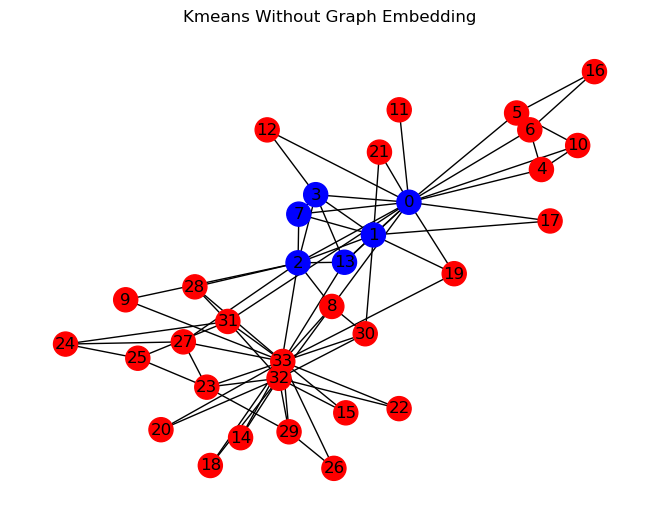

davies_bouldin_score:  1.553659955051211
silhouette_score:  0.26484221955280846


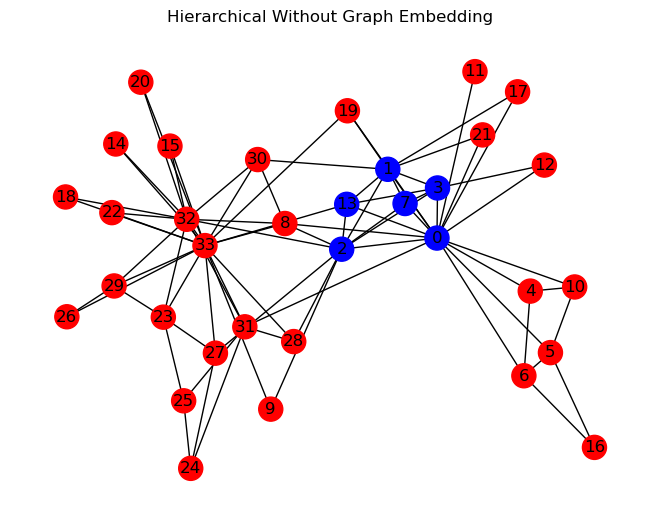

In [13]:
# Kmeans
kmeans = KMeans(n_clusters=num_cluster, random_state=42)
cluster_labels = kmeans.fit_predict(adjacency_matrix)
show_graph_clusterd(cluster_labels , "Kmeans Without Graph Embedding")


# hierarchical
hierarchical = AgglomerativeClustering(n_clusters=num_cluster)
cluster_labels = hierarchical.fit_predict(adjacency_matrix)
show_graph_clusterd(cluster_labels , "Hierarchical Without Graph Embedding")

# Laplacian Eigenmap

In [14]:
dimensions = [4, 5 ,2]


davies_bouldin_score:  1.8614308455897008
silhouette_score:  0.16771141038006396


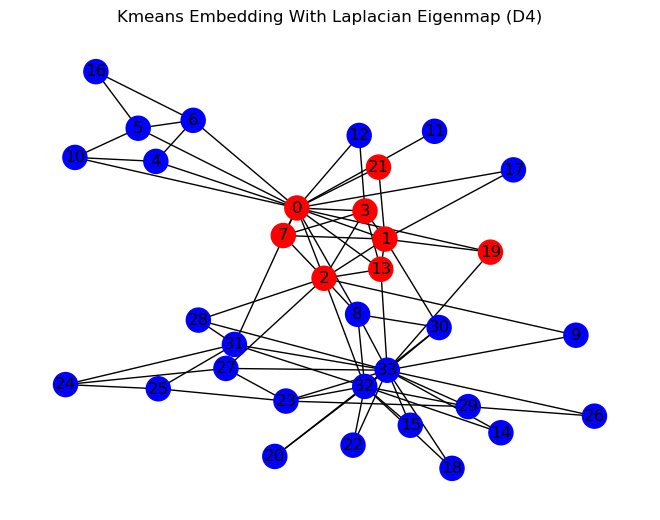

davies_bouldin_score:  1.553659955051211
silhouette_score:  0.26484221955280846


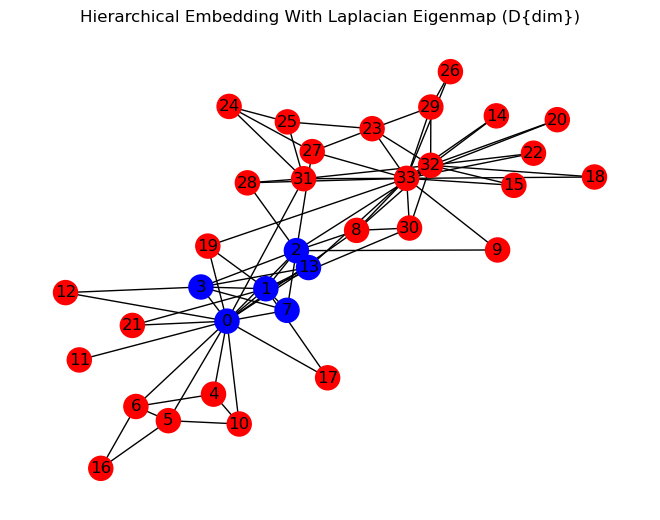

davies_bouldin_score:  1.8789438771369413
silhouette_score:  0.04732243545268211


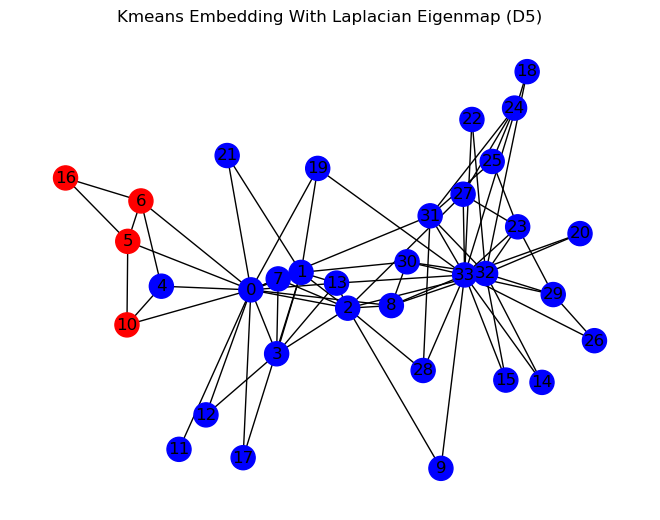

davies_bouldin_score:  1.553659955051211
silhouette_score:  0.26484221955280846


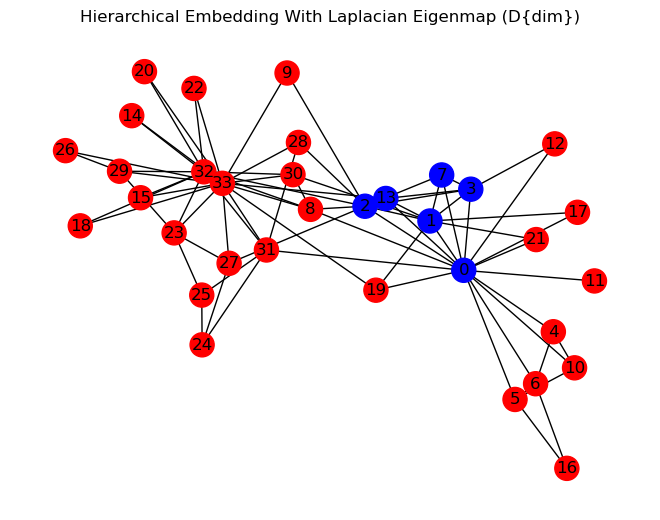

davies_bouldin_score:  1.8614308455897008
silhouette_score:  0.16771141038006396


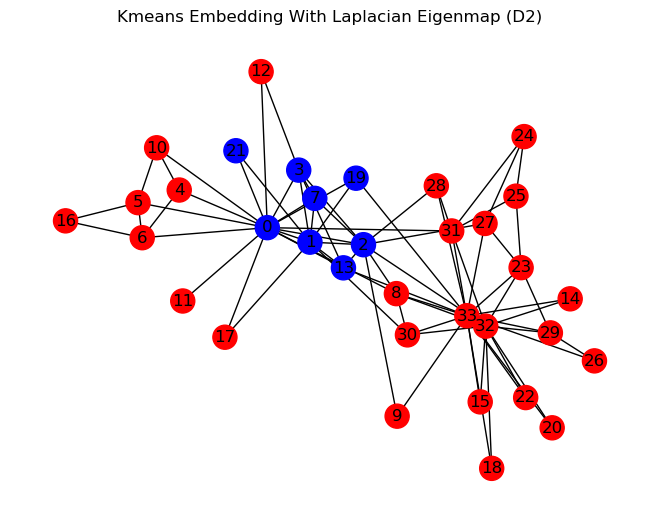

davies_bouldin_score:  2.8694334176474903
silhouette_score:  0.09869408093274964


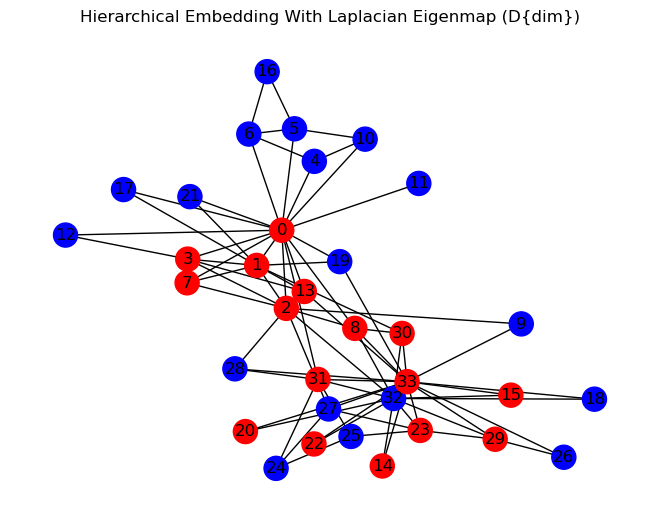

In [15]:
for dim in dimensions:
        #Embedding
        laplacian_embedding = SpectralEmbedding(n_components=dim)
        embedding_result = laplacian_embedding.fit_transform(adjacency_matrix)

        #Kmeans
        kmeans = KMeans(n_clusters=num_cluster, random_state=42)
        cluster_labels = kmeans.fit_predict(embedding_result)
        show_graph_clusterd(cluster_labels , f"Kmeans Embedding With Laplacian Eigenmap (D{dim})")

        # Hierarchical
        spectral = AgglomerativeClustering(n_clusters=num_cluster)
        cluster_labels = spectral.fit_predict(embedding_result)
        show_graph_clusterd(cluster_labels , "Hierarchical Embedding With Laplacian Eigenmap (D{dim})")

# Node2Vec

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:01<00:00, 141.59it/s]


davies_bouldin_score:  2.050306189913687
silhouette_score:  0.14295797077869524


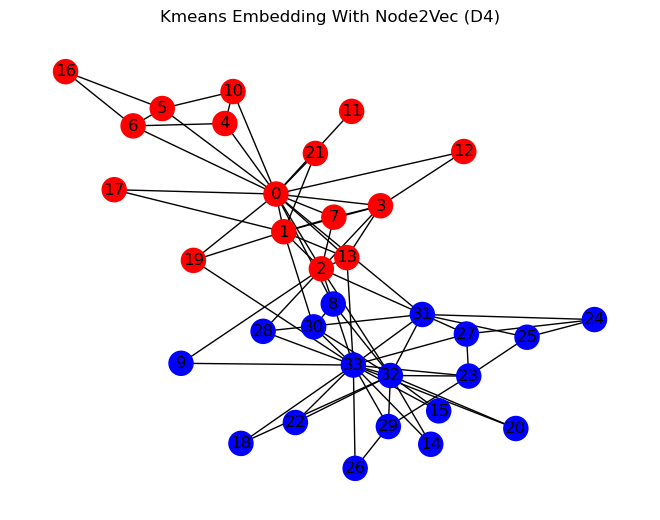

davies_bouldin_score:  2.050306189913687
silhouette_score:  0.14295797077869524


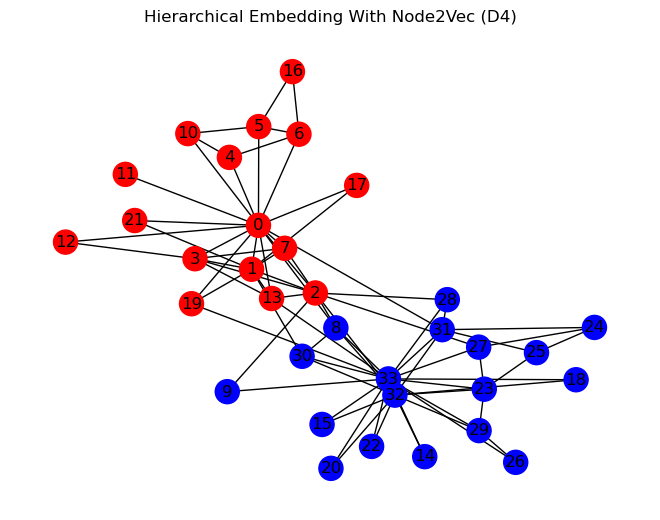

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:01<00:00, 120.15it/s]


davies_bouldin_score:  2.050306189913687
silhouette_score:  0.14295797077869524


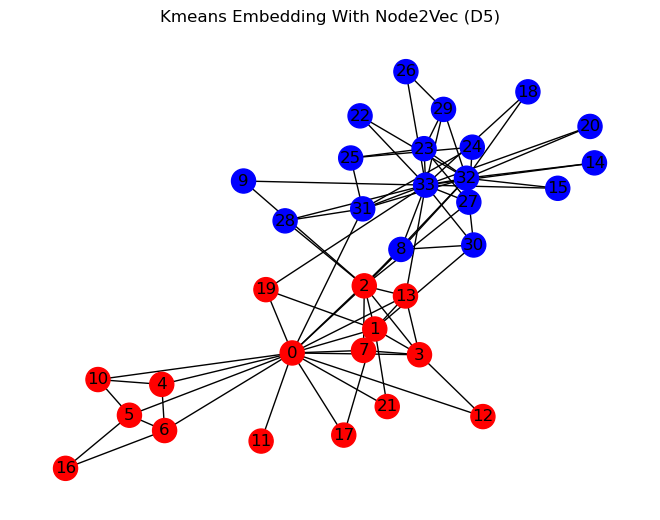

davies_bouldin_score:  2.050306189913687
silhouette_score:  0.14295797077869524


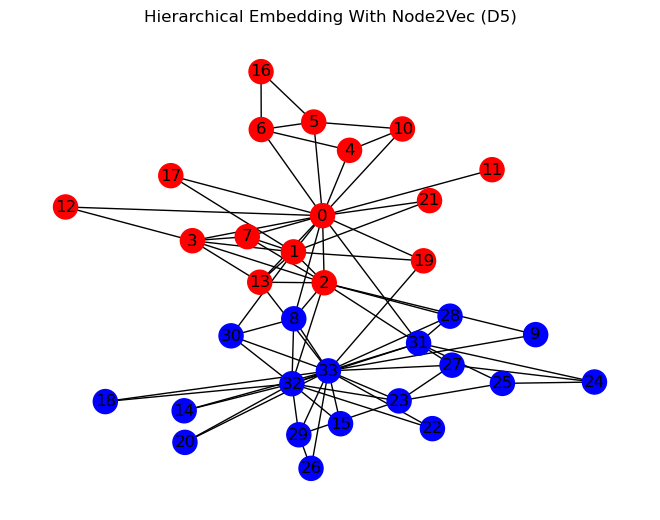

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:01<00:00, 141.55it/s]


davies_bouldin_score:  2.050306189913687
silhouette_score:  0.14295797077869524


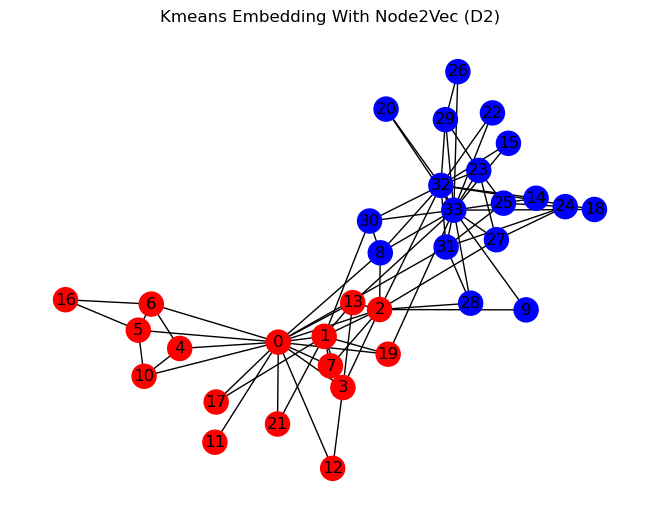

davies_bouldin_score:  2.050306189913687
silhouette_score:  0.14295797077869524


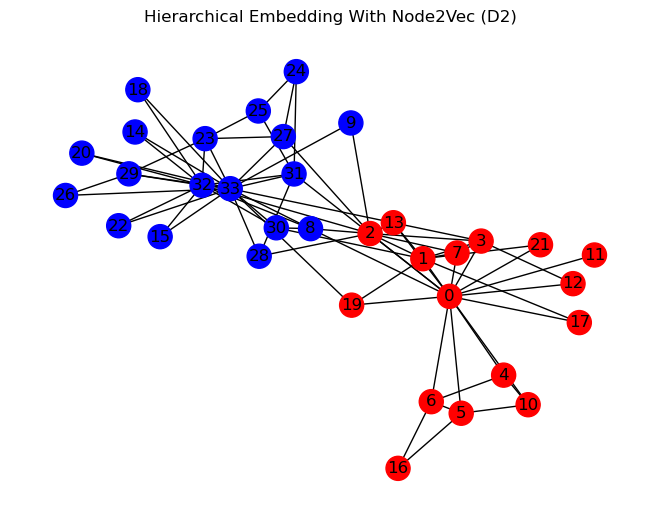

In [16]:
for dim in dimensions:
        #Embedding
        node2vec = Node2Vec(G, dimensions=dim, walk_length=30, num_walks=200)
        node2vec_model = node2vec.fit(window=10, min_count=1)
        node2vec_result = [node2vec_model.wv[str(node)] for node in G.nodes()]

        #KMeans
        kmeans = KMeans(n_clusters=num_cluster, random_state=42)
        cluster_labels = kmeans.fit_predict(node2vec_result)
        show_graph_clusterd(cluster_labels , f"Kmeans Embedding With Node2Vec (D{dim})")

        # Hierarchical
        spectral = AgglomerativeClustering(n_clusters=num_cluster)
        cluster_labels = spectral.fit_predict(node2vec_result)
        show_graph_clusterd(cluster_labels , F"Hierarchical Embedding With Node2Vec (D{dim})")

# Prediction Best Dimension